In [49]:
from glob import glob
import os
from imzml import IMZMLExtract
import matplotlib.pyplot as plt
import numpy as np

In [2]:
oldDir = r'/media/banikr2/DATA/MALDI/210427_Chen_pos_lipid'
oldImzFile = glob(os.path.join(oldDir, '*.imzML'))
print(oldImzFile)
newDir = r'/media/banikr2/DATA/MALDI/healthy_spinal_cord_IMS-selected'
newImzFile = glob(os.path.join(newDir, '*.imzML'))
print(newImzFile)

['/media/banikr2/DATA/MALDI/210427_Chen_pos_lipid/210427-Chen_poslip.imzML']
['/media/banikr2/DATA/MALDI/healthy_spinal_cord_IMS-selected/220210_reyzerml_IMC_380_plate2A_poslipid-NEW.imzML']


In [4]:
oldImz = IMZMLExtract(oldImzFile[0])

Opening regions file for /media/banikr2/DATA/MALDI/210427_Chen_pos_lipid/210427-Chen_poslip.imzML
1 545 628 244 291
2 695 785 244 303
3 704 798 146 212
4 848 940 201 265
5 988 1071 220 273


In [3]:
newImz = IMZMLExtract(newImzFile[0])

/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size". Updating name to "pixel size (x)".
  % (accession, raw_name, name)


Opening regions file for /media/banikr2/DATA/MALDI/healthy_spinal_cord_IMS-selected/220210_reyzerml_IMC_380_plate2A_poslipid-NEW.imzML
1 325 376 228 304
2 406 462 230 310
3 480 542 216 297
4 560 622 204 289
5 642 700 182 256
6 757 811 181 253
7 832 896 198 271
8 939 1001 201 275
9 1081 1133 199 271
10 1188 1246 199 273


#### Number of spectrums:

In [5]:
len(oldImz.parser.coordinates)

19819

In [6]:
len(newImz.parser.coordinates)

35484

#### m/z:

The number of m/z in MS images seem to be consistent. 

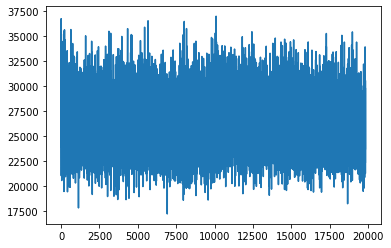

In [10]:
plt.plot(oldImz.parser.mzLengths)

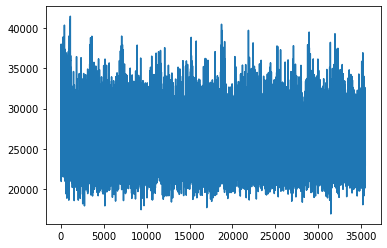

In [32]:
plt.plot(newImz.parser.mzLengths)

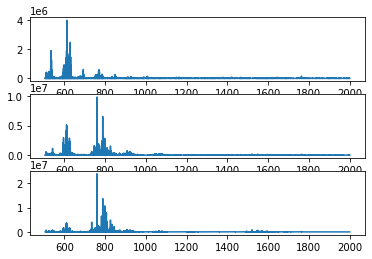

In [12]:
plt.subplot(311)
plt.plot(oldImz.parser.getspectrum(12)[0], oldImz.parser.getspectrum(12)[1])
plt.subplot(312)
plt.plot(oldImz.parser.getspectrum(600)[0], oldImz.parser.getspectrum(600)[1])
plt.subplot(313)
plt.plot(oldImz.parser.getspectrum(1331)[0], oldImz.parser.getspectrum(1331)[1])
plt.show()

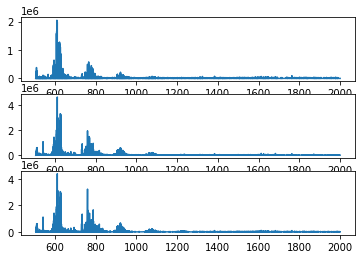

In [23]:
plt.subplot(311)
plt.plot(newImz.parser.getspectrum(12)[0], newImz.parser.getspectrum(12)[1])
plt.subplot(312)
plt.plot(newImz.parser.getspectrum(6000)[0], newImz.parser.getspectrum(6000)[1])
plt.subplot(313)
plt.plot(newImz.parser.getspectrum(13031)[0], newImz.parser.getspectrum(13031)[1])
plt.show()

In [36]:
regionID = 1
regInd = oldImz.get_region_indices(regionID)
# for i, coord in enumerate(regInd):
#     spectrum = self.imzObj.parser.getspectrum(self.imzObj.coord2index.get(coord)) #[0]

In [38]:
len(regInd)

3142

In [43]:
oldImz.parser.getspectrum(100)[0][-1]

1999.982666015625

same min and max m/z value in all spectrum. 

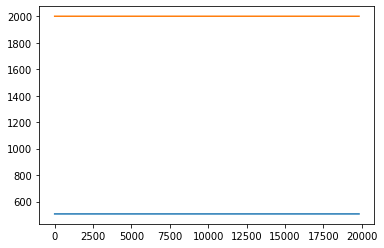

In [44]:
minmz = []
maxmz = []
for i in range(len(oldImz.parser.coordinates)):
    minmz.append(oldImz.parser.getspectrum(i)[0][0])
    maxmz.append(oldImz.parser.getspectrum(i)[0][-1])
    
plt.plot(minmz)
plt.plot(maxmz)

In [52]:
min(minmz), np.std(minmz), max(maxmz), np.std(maxmz)

(506.8382263183594, 0.0, 1999.982666015625, 0.0)

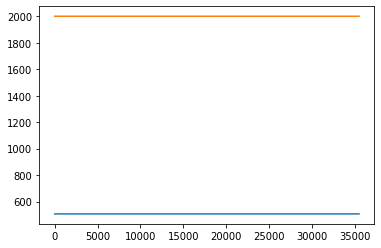

In [53]:
minmz2 = []
maxmz2 = []
for i in range(len(newImz.parser.coordinates)):
    minmz2.append(newImz.parser.getspectrum(i)[0][0])
    maxmz2.append(newImz.parser.getspectrum(i)[0][-1])
    
plt.plot(minmz2)
plt.plot(maxmz2)

In [54]:
min(minmz2), np.std(minmz2), max(maxmz2), np.std(maxmz2)

(506.84063720703125, 0.0, 1999.9779052734375, 0.0)

Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Found region 1 with shape (84, 48, 36755)
Found region 1 with shape (84, 48, 36755)
Fetching region spectra
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:27
|##############################################################################################################################################################################################| 100% Time: 0:00:00


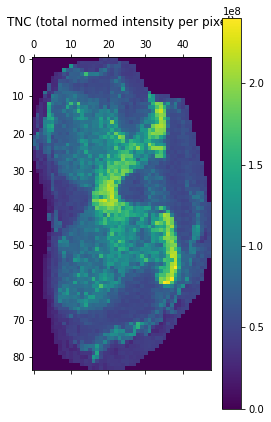

In [15]:
oldImz.plot_tnc(oldImz.get_region_array(1))

1 ((325, 376, 228, 304), 3336)
2 ((406, 462, 230, 310), 3701)
3 ((480, 542, 216, 297), 4026)
4 ((560, 622, 204, 289), 4053)
5 ((642, 700, 182, 256), 3577)
6 ((757, 811, 181, 253), 3167)
7 ((832, 896, 198, 271), 3319)
8 ((939, 1001, 201, 275), 3740)
9 ((1081, 1133, 199, 271), 2996)
10 ((1188, 1246, 199, 273), 3569)


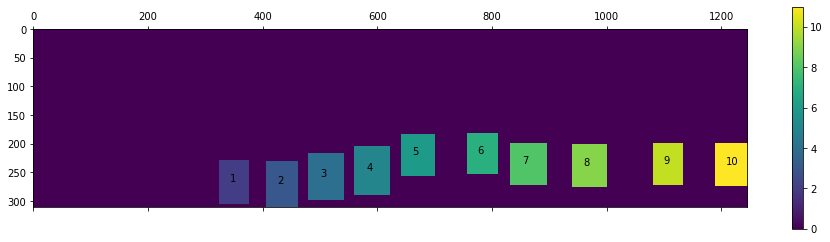

{1: ((325, 376, 228, 304), 3336),
 2: ((406, 462, 230, 310), 3701),
 3: ((480, 542, 216, 297), 4026),
 4: ((560, 622, 204, 289), 4053),
 5: ((642, 700, 182, 256), 3577),
 6: ((757, 811, 181, 253), 3167),
 7: ((832, 896, 198, 271), 3319),
 8: ((939, 1001, 201, 275), 3740),
 9: ((1081, 1133, 199, 271), 2996),
 10: ((1188, 1246, 199, 273), 3569)}

In [20]:
newImz.list_regions()

Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Found region 1 with shape (52, 77, 41436)
Found region 1 with shape (52, 77, 41436)
Fetching region spectra
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:00
|##############################################################################################################################################################################################| 100% Time: 0:00:01


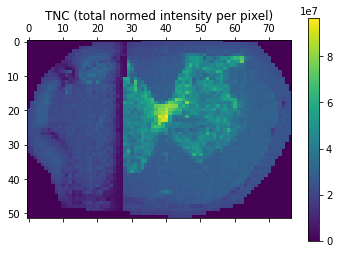

In [19]:
newImz.plot_tnc(newImz.get_region_array(1))

Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Found region 2 with shape (57, 81, 38959)
Found region 2 with shape (57, 81, 38959)
Fetching region spectra
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:30
|##############################################################################################################################################################################################| 100% Time: 0:00:01


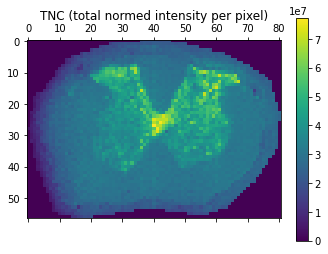

In [17]:
newImz.plot_tnc(newImz.get_region_array(2))

Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Found region 7 with shape (65, 74, 39692)
Found region 7 with shape (65, 74, 39692)
Fetching region spectra
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:27
|##############################################################################################################################################################################################| 100% Time: 0:00:01


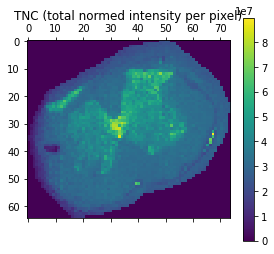

In [18]:
newImz.plot_tnc(newImz.get_region_array(7))

#### Comparison between post cardinal/peak processing

In [55]:
newCDir = r'/media/banikr2/DATA/MALDI/fromCardinal/healthy_spinal_cord_IMS-selected'
newCFile = glob(os.path.join(newCDir, '*.imzML'))
print(newCFile)

['/media/banikr2/DATA/MALDI/fromCardinal/healthy_spinal_cord_IMS-selected/220210_reyzerml_IMC_380_plate2A_poslipid-NEW.imzML']


/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000042 found with incorrect name "max count of pixel x". Updating name to "max count of pixels x".
  % (accession, raw_name, name)
/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000043 found with incorrect name "max count of pixel y". Updating name to "max count of pixels y".
  % (accession, raw_name, name)
/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  % (accession, raw_name, name)
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions


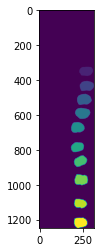

Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished


In [56]:
newCImz = IMZMLExtract(newCFile[0])

In [26]:
oldCDir = r'/media/banikr2/DATA/MALDI/fromCardinal/PosLip'
oldCFile = glob(os.path.join(oldCDir, '*.imzML'))
print(oldCFile)

['/media/banikr2/DATA/MALDI/fromCardinal/PosLip/210427-Chen_poslip-peakpicked.imzML']


In [27]:
oldCImz = IMZMLExtract(oldCFile[0])

Opening regions file for /media/banikr2/DATA/MALDI/fromCardinal/PosLip/210427-Chen_poslip-peakpicked.imzML
1 545 628 244 291
2 695 785 244 303
3 704 798 146 212
4 848 940 201 265
5 988 1071 220 273


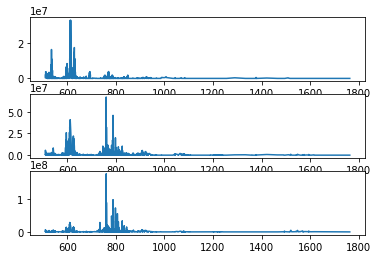

In [31]:
plt.subplot(311)
plt.plot(oldCImz.parser.getspectrum(12)[0], oldCImz.parser.getspectrum(12)[1])
plt.subplot(312)
plt.plot(oldCImz.parser.getspectrum(600)[0], oldCImz.parser.getspectrum(600)[1])
plt.subplot(313)
plt.plot(oldCImz.parser.getspectrum(1331)[0], oldCImz.parser.getspectrum(1331)[1])
plt.show()

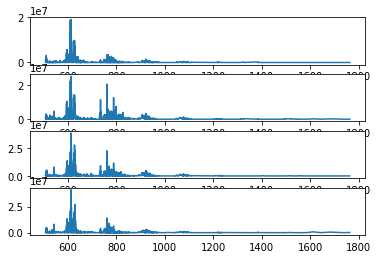

In [60]:
plt.subplot(411)
plt.plot(newCImz.parser.getspectrum(12)[0], newCImz.parser.getspectrum(12)[1])
plt.subplot(412)
plt.plot(newCImz.parser.getspectrum(600)[0], newCImz.parser.getspectrum(600)[1])
plt.subplot(413)
plt.plot(newCImz.parser.getspectrum(13031)[0], newCImz.parser.getspectrum(13031)[1])
plt.subplot(414)
plt.plot(newCImz.parser.getspectrum(34031)[0], newCImz.parser.getspectrum(34031)[1])
plt.show()